In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import distance

parser = distance.Parser()
d_matrix = parser.get_distance_matrix('cnnhealth.txt', distance.euclidean_distance)

Gathering vocabulary...


100%|██████████| 4061/4061 [00:00<00:00, 37421.83it/s]


Generating vectors...


100%|██████████| 4061/4061 [00:00<00:00, 32129.86it/s]


Generating text file...
Gathering vocabulary...


100%|██████████| 4061/4061 [00:00<00:00, 44647.04it/s]


Generating vectors...


100%|██████████| 4061/4061 [00:00<00:00, 58250.24it/s]

Generating text file...


Generating distance matrix...


100%|██████████| 4060/4060 [02:32<00:00, 26.65it/s] 


In [15]:
d_matrix_m = parser.get_distance_matrix('cnnhealth.txt', distance.manhattan_distance)

Gathering vocabulary...


100%|██████████| 4061/4061 [00:00<00:00, 38759.53it/s]


Generating vectors...


100%|██████████| 4061/4061 [00:00<00:00, 55245.31it/s]


Generating text file...
Generating distance matrix...


100%|██████████| 4060/4060 [03:10<00:00, 21.26it/s] 


In [26]:
s_matrix = np.max(d_matrix) - d_matrix
s_matrix_m = np.max(d_matrix_m) - d_matrix_m

d_matrices = [d_matrix, d_matrix_m]
s_matrices = [s_matrix, s_matrix_m]

def eval(model, sim = False):
    clusters = [None, None]
    for i, m in enumerate(s_matrices if sim else d_matrices):
        print("Euclidean" if i == 0 else "Manhattan", "Distance")
        clusters[i] = model.cluster(m)
        unique, counts = np.unique(clusters[i], return_counts=True)
        print(unique)
        print(counts)
    return clusters

In [3]:
bow = parser.get_bag_of_words("cnnhealth.txt")

Gathering vocabulary...


100%|██████████| 4061/4061 [00:00<00:00, 54927.13it/s]


Generating vectors...


100%|██████████| 4061/4061 [00:00<00:00, 73686.47it/s]

Generating text file...


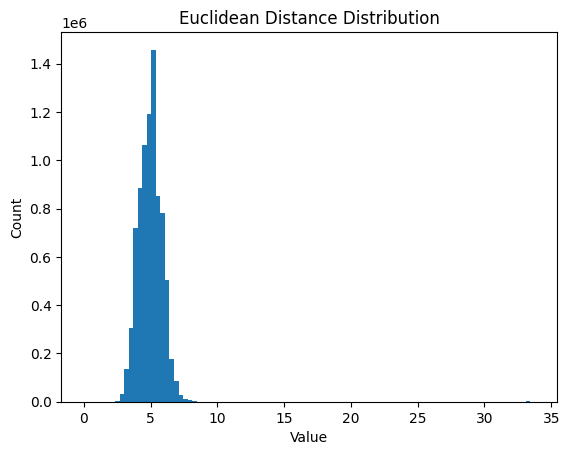

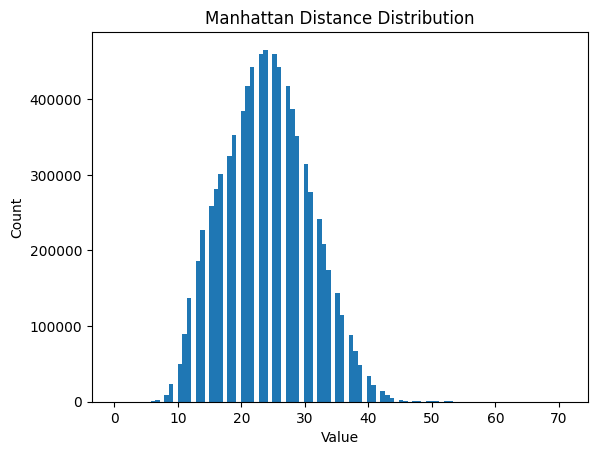

In [45]:
from util import plot_dists
import matplotlib.pyplot as plt

ax = plt.subplot()
plot_dists(ax, d_matrix)
ax.set_title("Euclidean Distance Distribution")
plt.show()

ax = plt.subplot()
plot_dists(ax, d_matrix_m)
ax.set_title("Manhattan Distance Distribution")
plt.show()

In [27]:
from single_link import SingleLink

sl_clusters = eval(SingleLink(num_clusters=8))

Euclidean Distance
Clustering with single link...
[0 1 2 3 4 5 6 7]
[4054    1    1    1    1    1    1    1]
Manhattan Distance
Clustering with single link...
[0 1 2 3 4 5 6 7]
[4054    1    1    1    1    1    1    1]


In [28]:
from average_linkage import AverageLinkage

al_clusters = eval(AverageLinkage(num_clusters=8))

Euclidean Distance
Clustering with average linkage...
[0 1 2 3 4 5 6 7]
[4052    1    3    1    1    1    1    1]
Manhattan Distance
Clustering with average linkage...
[0 1 2 3 4 5 6 7]
[4054    1    1    1    1    1    1    1]


In [29]:
from kmedoids import KMedoidsClustering

kmed_clusters = eval(KMedoidsClustering(num_clusters=8))

Euclidean Distance
Clustering with K-Medoids...
[0 1 2 3 4 5 6 7]
[2249  600    8  417   28  438  176  145]
Manhattan Distance
Clustering with K-Medoids...
[0 1 2 3 4 5 6 7]
[2245  503  534   13  431   30  161  144]


In [30]:
from dbscan import DBScanClustering

db_clusters = [eval(DBScanClustering(eps=i / 5 + 2)) for i in range(10)]

Euclidean Distance
Clustering with dbscan(eps=2.0)...
[-1  0  1]
[4047    7    7]
Manhattan Distance
Clustering with dbscan(eps=2.0)...
[-1  0]
[4056    5]
Euclidean Distance
Clustering with dbscan(eps=2.2)...
[-1  0  1]
[4047    7    7]
Manhattan Distance
Clustering with dbscan(eps=2.2)...
[-1  0]
[4056    5]
Euclidean Distance
Clustering with dbscan(eps=2.4)...
[-1  0  1  2  3  4  5  6]
[3972   48    7    5    5    6   11    7]
Manhattan Distance
Clustering with dbscan(eps=2.4)...
[-1  0]
[4056    5]
Euclidean Distance
Clustering with dbscan(eps=2.6)...
[-1  0  1  2  3  4]
[3816  210   16    7    5    7]
Manhattan Distance
Clustering with dbscan(eps=2.6)...
[-1  0]
[4056    5]
Euclidean Distance
Clustering with dbscan(eps=2.8)...
[-1  0  1  2  3]
[3493  549    7    5    7]
Manhattan Distance
Clustering with dbscan(eps=2.8)...
[-1  0]
[4056    5]
Euclidean Distance
Clustering with dbscan(eps=3.0)...
[-1  0  1  2]
[2819 1228    7    7]
Manhattan Distance
Clustering with dbscan(eps=3.0)

In [31]:
from spectral import SpecClustering

sp_clusters = eval(SpecClustering(num_clusters=8), sim=True)

Euclidean Distance
Clustering with spectral clustering...
[0 1 2 3 4 5 6 7]
[ 548  484    1  486  479 1076  564  423]
Manhattan Distance
Clustering with spectral clustering...
[0 1 2 3 4 5 6 7]
[ 226  356  501  429 1199  417  572  361]


In [32]:
from affinity import AffinityClustering

af_clusters = eval(AffinityClustering(), sim=True)

Euclidean Distance
Clustering with affinity propogation...


c:\Users\aaore\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225]
[  2  25   1   2   1   1   1   1   1   1  16   1   2   1   1   1   1   1
   1   1 

c:\Users\aaore\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
